# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# load the env file and kew to api_key
load_dotenv()
api_key = os.getenv("NEWS_API")

In [3]:
# initialize api client
newsapi = NewsApiClient(api_key=api_key)


In [4]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q="bitcoin", language="en", sort_by="relevancy")
btc_headlines["articles"][0]

{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Romain Dillet',
 'title': 'Bitcoin passes $20k and reaches all-time high',
 'description': 'After reaching a previous all-time high on November 30th, 2020 and December 1st, 2020, bitcoin is now trading well above $20,000 and has surpassed its previous peak price. Bitcoin’s value has rapidly increased over the past two months. According to CoinMarket…',
 'url': 'http://techcrunch.com/2020/12/16/bitcoin-passes-20k-and-reaches-all-time-high/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2017/11/gettyimages-869865484.jpg?w=602',
 'publishedAt': '2020-12-16T17:12:40Z',
 'content': 'After reaching a previous all-time high on November 30th, 2020 and December 1st, 2020, bitcoin is now trading well above $20,000 and has surpassed its previous peak price.\r\nBitcoins value has rapidly… [+1062 chars]'}

In [5]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q="ethereum", language="en", sort_by="relevancy")
eth_headlines["articles"][0]

{'source': {'id': None, 'name': 'Gizmodo.com'},
 'author': 'Matt Novak',
 'title': "Ripple Claims Bitcoin Is 'Chinese-Controlled' While Announcing New Lawsuit From SEC",
 'description': 'The Securities and Exchange Commission plans to sue Ripple in federal civil court for selling unregistered securities, according to a news release published online by the cryptocurrency company late Monday. Ripple defended its cryptocurrency, known as XRP, as…',
 'url': 'https://gizmodo.com/ripple-claims-bitcoin-is-chinese-controlled-while-annou-1845932148',
 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/ahh1hzpmuhrh8ybwimab.jpg',
 'publishedAt': '2020-12-22T11:30:00Z',
 'content': 'The Securities and Exchange Commission plans to sue Ripple in federal civil court for selling unregistered securities, according to a news release published online by the cryptocurrency company late … [+2950 chars]'}

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiment.append({
            "Text": text,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
btc_df = pd.DataFrame(btc_sentiment)


cols = ["Compound", "Negative", "Neutral", "Positive", "Text"]
btc_df = btc_df[cols]

btc_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.6486,0.000,0.826,0.174,After reaching a previous all-time high on Nov...
1,0.4019,0.000,0.928,0.072,Its been almost three years to the day since t...
2,0.2732,0.083,0.781,0.136,Everything is dumb until it works.\r\nAs 2020 ...
3,-0.2924,0.059,0.941,0.000,The government of India is considering an 18% ...
4,0.3612,0.080,0.749,0.171,Just weeks after it shattered its yearslong as...


In [7]:
# Create the ethereum sentiment scores DataFrame
# Create the Bitcoin sentiment scores DataFrame
eth_sentiment = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiment.append({
            "Text": text,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(eth_sentiment)


cols = ["Compound", "Negative", "Neutral", "Positive", "Text"]
eth_df = eth_df[cols]

eth_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.5267,0.000,0.864,0.136,The Securities and Exchange Commission plans t...
1,0.0772,0.085,0.849,0.066,Bitcoin was once derided by serious investors ...
2,0.0000,0.000,1.000,0.000,FILE PHOTO: Representations of virtual currenc...
3,0.0000,0.000,1.000,0.000,FILE PHOTO: A representation of virtual curren...
4,0.0000,0.000,1.000,0.000,FILE PHOTO: Representations of virtual currenc...


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Negative,Neutral,Positive
count,18.000000,18.000000,18.000000,18.000000
mean,0.240572,0.024444,0.894500,0.081000
std,0.377192,0.037351,0.079357,0.074163
min,-0.585900,0.000000,0.749000,0.000000
25%,0.000000,0.000000,0.849250,0.000000
50%,0.317200,0.000000,0.896500,0.086500
75%,0.560600,0.054750,0.953750,0.136000
max,0.801600,0.103000,1.000000,0.209000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Negative,Neutral,Positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.106342,0.019474,0.934632,0.045895
std,0.330420,0.034473,0.053418,0.054116
min,-0.493900,0.000000,0.845000,0.000000
25%,0.000000,0.000000,0.901000,0.000000
50%,0.077200,0.000000,0.940000,0.038000
75%,0.305600,0.029500,0.981000,0.067000
max,0.636900,0.099000,1.000000,0.155000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: They're even oddly

Q. Which coin had the highest positive score?

A: Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Expand the default stopwords list if necessary
sw = set(stopwords.words('english'))

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    lemmatizer = WordNetLemmatizer()

    sw = set(stopwords.words('english'))
    sw_addon = {'said', 'also', 'reuters', 'could','would'} # adding additional stop words.
    swu = sw.union(sw_addon)
    regex = re.compile("[^a-zA-Z ]")
    reg_clean = regex.sub('', text)
    t_word=word_tokenize(reg_clean)
    first_pass= [word.lower() for word in t_word if word.lower() not in swu]
    tokens = [lemmatizer.lemmatize(word, pos='a') for word in first_pass if len(word)>2]
    
    return tokens


In [13]:
# Create a new tokens column for bitcoin
btc_df["Tokens"] = btc_df["Text"].apply(tokenizer)
btc_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.6486,0.000,0.826,0.174,After reaching a previous all-time high on Nov...,"[reaching, previous, alltime, high, november, ..."
1,0.4019,0.000,0.928,0.072,Its been almost three years to the day since t...,"[almost, three, years, day, since, price, bitc..."
2,0.2732,0.083,0.781,0.136,Everything is dumb until it works.\r\nAs 2020 ...,"[everything, dumb, worksas, comes, close, cryp..."
3,-0.2924,0.059,0.941,0.000,The government of India is considering an 18% ...,"[government, india, considering, tax, bitcoin,..."
4,0.3612,0.080,0.749,0.171,Just weeks after it shattered its yearslong as...,"[weeks, shattered, yearslong, aspiration, reac..."


In [14]:
# Create a new tokens column for ethereum
eth_df["Tokens"] = eth_df["Text"].apply(tokenizer)
eth_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.5267,0.000,0.864,0.136,The Securities and Exchange Commission plans t...,"[securities, exchange, commission, plans, sue,..."
1,0.0772,0.085,0.849,0.066,Bitcoin was once derided by serious investors ...,"[bitcoin, derided, serious, investors, bubble,..."
2,0.0000,0.000,1.000,0.000,FILE PHOTO: Representations of virtual currenc...,"[file, photo, representations, virtual, curren..."
3,0.0000,0.000,1.000,0.000,FILE PHOTO: A representation of virtual curren...,"[file, photo, representation, virtual, currenc..."
4,0.0000,0.000,1.000,0.000,FILE PHOTO: Representations of virtual currenc...,"[file, photo, representations, virtual, curren..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
def btc_bigram_counter(btc_articles): 
    
    btc_string = ' '.join(btc_df['Text'])
    btc_processed = tokenizer(btc_string)
    btc_bigrams = ngrams(btc_processed, n=2)
    btc_top_30 = dict(Counter(btc_bigrams).most_common(30))
    return btc_top_30
btc_bigram_counter(btc_headlines)

{('virtual', 'currency'): 3,
 ('alltime', 'high'): 2,
 ('value', 'bitcoin'): 2,
 ('new', 'alltime'): 2,
 ('chars', 'stafffile'): 2,
 ('stafffile', 'photo'): 2,
 ('illustration', 'taken'): 2,
 ('reaching', 'previous'): 1,
 ('previous', 'alltime'): 1,
 ('high', 'november'): 1,
 ('november', 'december'): 1,
 ('december', 'bitcoin'): 1,
 ('bitcoin', 'trading'): 1,
 ('trading', 'well'): 1,
 ('well', 'surpassed'): 1,
 ('surpassed', 'previous'): 1,
 ('previous', 'peak'): 1,
 ('peak', 'pricebitcoins'): 1,
 ('pricebitcoins', 'value'): 1,
 ('value', 'rapidly'): 1,
 ('rapidly', 'chars'): 1,
 ('chars', 'almost'): 1,
 ('almost', 'three'): 1,
 ('three', 'years'): 1,
 ('years', 'day'): 1,
 ('day', 'since'): 1,
 ('since', 'price'): 1,
 ('price', 'bitcoin'): 1,
 ('bitcoin', 'close'): 1,
 ('close', 'breaking'): 1}

In [17]:
# Generate the Ethereum N-grams where N=2
def eth_bigram_counter(eth_articles): 
    
    eth_string = ' '.join(eth_df['Text'])
    eth_processed = tokenizer(eth_string)
    eth_bigrams = ngrams(eth_processed, n=2)
    eth_top_30 = dict(Counter(eth_bigrams).most_common(30))
    return eth_top_30
eth_bigram_counter(eth_headlines)

{('chars', 'file'): 4,
 ('file', 'photo'): 4,
 ('virtual', 'currency'): 4,
 ('currency', 'bitcoin'): 4,
 ('bitcoin', 'seen'): 4,
 ('illustration', 'taken'): 4,
 ('reutersdado', 'ruvicillustrationlondon'): 4,
 ('chars', 'new'): 4,
 ('new', 'york'): 4,
 ('ruvicillustrationlondon', 'major'): 3,
 ('cryptocurrency', 'funds'): 3,
 ('funds', 'products'): 3,
 ('chars', 'bitcoin'): 2,
 ('photo', 'representations'): 2,
 ('representations', 'virtual'): 2,
 ('seen', 'picture'): 2,
 ('picture', 'illustration'): 2,
 ('taken', 'taken'): 2,
 ('taken', 'march'): 2,
 ('march', 'reutersdado'): 2,
 ('major', 'cryptocurrency'): 2,
 ('cryptocurrency', 'chars'): 2,
 ('photo', 'representation'): 2,
 ('representation', 'virtual'): 2,
 ('taken', 'november'): 2,
 ('november', 'reutersdado'): 2,
 ('york', 'institutional'): 2,
 ('institutional', 'investors'): 2,
 ('investors', 'pumped'): 2,
 ('pumped', 'million'): 2}

In [18]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    tokens = [tokens[i][j] for i in range(len(tokens)) for j in range(len(tokens[i]))]
    return Counter(tokens).most_common(N)

In [19]:
# Get the top 10 words for Bitcoin
btc_words = token_count(btc_df['Tokens'])
btc_words

[('chars', 18),
 ('bitcoin', 11),
 ('cryptocurrency', 7),
 ('value', 5),
 ('new', 4),
 ('year', 4),
 ('previous', 3),
 ('alltime', 3),
 ('since', 3),
 ('price', 3)]

In [20]:
# Get the top 10 words for Ethereum
eth_words = token_count(eth_df['Tokens'])
eth_words

[('chars', 19),
 ('bitcoin', 13),
 ('cryptocurrency', 11),
 ('currency', 7),
 ('taken', 6),
 ('new', 5),
 ('ethereum', 5),
 ('file', 4),
 ('photo', 4),
 ('virtual', 4)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

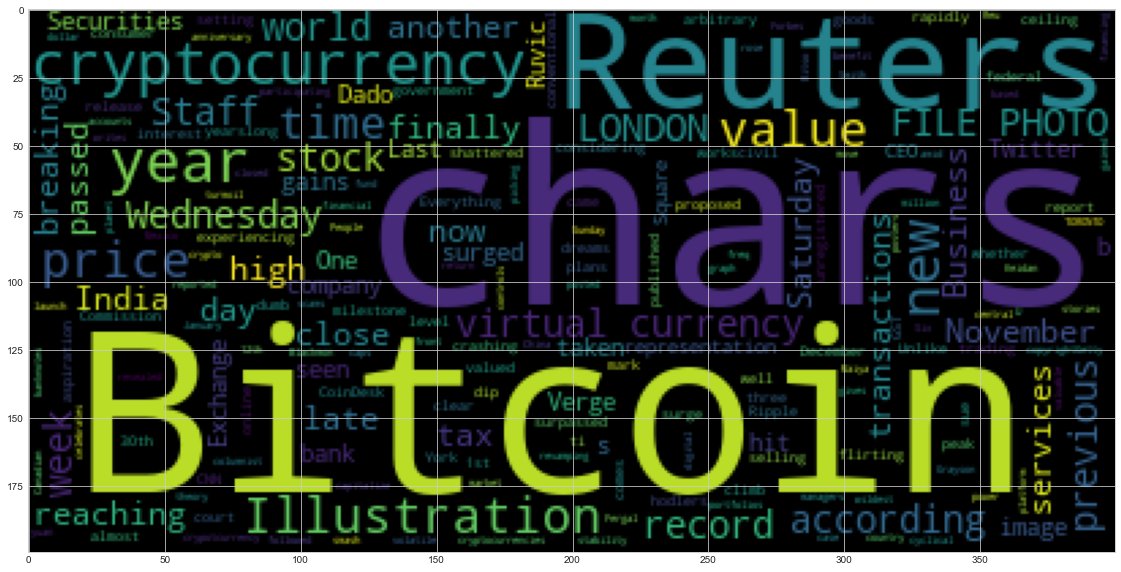

In [22]:
# Generate the Bitcoin word cloud
btc_df_str = btc_df["Text"].str.cat()
btc_wc = WordCloud().generate(btc_df_str)
plt.imshow(btc_wc)
    

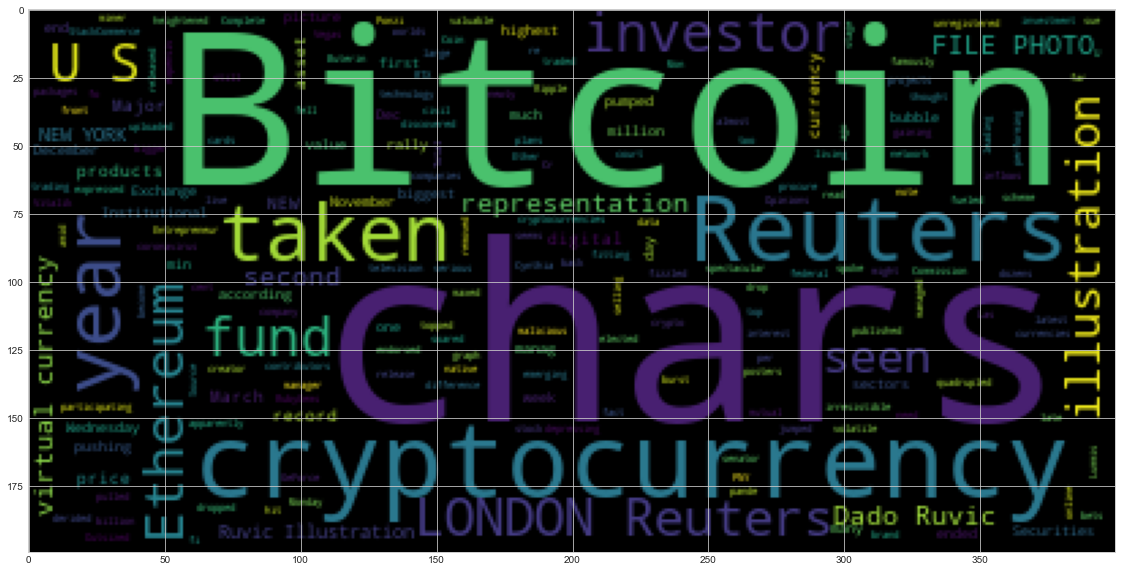

In [23]:
# Generate the Ethereum word cloud
eth_df_str = eth_df["Text"].str.cat()
eth_wc = WordCloud().generate(eth_df_str)
plt.imshow(eth_wc)
    

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [29]:
# Concatenate all of the bitcoin text together
btc_news_string = ' '.join(btc_df['Text'])
btc_news_string

"After reaching a previous all-time high on November 30th, 2020 and December 1st, 2020, bitcoin is now trading well above $20,000 and has surpassed its previous peak price.\r\nBitcoins value has rapidly… [+1062 chars] Its been almost three years to the day since the price of Bitcoin was close to breaking the $20,000 ceiling and came crashing down. On Wednesday, the arbitrary milestone of hodlers dreams was finally… [+1273 chars] Everything is dumb until it works.\r\nAs 2020 comes to a close, the cryptocurrency world is experiencing another late-year surge of consumer interest as prices climb in value. Bitcoin is over $23,000 a… [+1705 chars] The government of India is considering an 18% tax on all bitcoin transactions, according to a new report from the Times of India. Its not clear whether the proposed goods and services tax (GST) would… [+1397 chars] Just weeks after it shattered its yearslong aspiration of reaching $20,000 in value, Bitcoin is at it again. On Saturday, the cryptocur

In [31]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_news_string)

# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin Nammed Entry Recog"


In [32]:
# Render the visualization
displacy.render(btc_doc, style='ent')


In [33]:
# List all Entities
for ent in btc_doc.ents:
    print(ent.text, ent.label_)

November 30th, 2020 DATE
December 1st DATE
2020 DATE
bitcoin GPE
above $20,000 MONEY
almost three years DATE
the day DATE
Bitcoin GPE
20,000 MONEY
Wednesday DATE
2020 DATE
late-year DATE
Bitcoin GPE
over $23,000 MONEY
India GPE
18% PERCENT
bitcoin GPE
the Times of India ORG
Just weeks DATE
20,000 MONEY
Bitcoin GPE
Saturday DATE
33,000 MONEY
CoinDesk PERSON
New York GPE
CNN ORG
$30,000 mark MONEY
weeks DATE
Saturday DATE
above $33,000 MONEY
The Securities and Exchange Commission ORG
digital yuan ORG
the People’s Bank of China ORG
Bitcoin GPE
20,000 MONEY
14,800 MONEY
more than 170% PERCENT
this year DATE
Six years DATE
Mexico GPE
$62 million MONEY
Grayson Blackmon / PERSON
the year DATE
the day DATE
Twitter ORG
6 CARDINAL
6 CARDINAL
one CARDINAL
above $20,000 MONEY
Wednesday DATE
a year DATE
Last Sunday DATE
Bitcoin GPE
50% PERCENT
the previous month DATE
the week DATE
24.8% PERCENT
Bitcoin GPE
12th ORDINAL
Forbes ORG
Reuters ORG
Bitcoin GPE
U.S. GPE
January 6, 2020 DATE
REUTERS/ ORG
Da

---

## Ethereum NER

In [35]:
# Concatenate all of the bitcoin text together
eth_news_string = ' '.join(eth_df['Text'])
eth_news_string

'The Securities and Exchange Commission plans to sue Ripple in federal civil court for selling unregistered securities, according to a news release published online by the cryptocurrency company late … [+2950 chars] Bitcoin was once derided by serious investors as a bubble or a Ponzi scheme. But this year, it has become an irresistible investment for many of them.\xa0\r\nJust this Wednesday, bitcoin topped $20,000 fo… [+5208 chars] FILE PHOTO: Representations of virtual currency Bitcoin are seen in this picture illustration taken taken March 13, 2020. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - Major U.S. cryptocurrency… [+1031 chars] FILE PHOTO: A representation of virtual currency Bitcoin is seen in front of a stock graph in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - Major U.S.… [+1046 chars] FILE PHOTO: Representations of virtual currency Bitcoin are seen in this picture illustration taken taken March 13, 2020. REUTERS/

In [36]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_news_string)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"


In [37]:
# Render the visualization
displacy.render(eth_doc, style='ent')


In [38]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

The Securities and Exchange Commission ORG
Bitcoin GPE
this year DATE
Wednesday DATE
bitcoin GPE
20,000 MONEY
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Reuters ORG
U.S. GPE
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
U.S. GPE
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Reuters ORG
U.S. GPE
NEW YORK GPE
Reuters ORG
$5.6 billion MONEY
this year DATE
more than 600% PERCENT
2019 DATE
Coin ORG
NEW YORK GPE
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
NEW YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
Bitcoin GPE
Monday DATE
new-year DATE
as much as 17 CARDINAL
March DATE
2020 DATE
Las Vegas GPE
dozens CARDINAL
3080 CARDINAL
Vitalik Buterin PERSON
14 CARDINAL
11 CARDINAL
Ethereum ORG
second ORDINAL
above $1,000 MONEY
December DATE
15 DATE
2020 DATE
6 min QUANTITY
A few days ago DATE
US GPE
Cynthia Lummis PERSON
Bitcoin GPE
second ORDINAL
December 2020 DATE
first ORDINAL
Ethereum 2.0 ORG
Bitcoin GPE
November